In [ ]:
import sklearn
import sklearn.datasets as datasets
import numpy as np

diabetes=sklearn.datasets.load_diabetes()
#diabetes.keys()
diabetes_data = diabetes['data']
diabetes_target = diabetes['target']
diabetes_descr = diabetes['DESCR']

print(diabetes_descr)
print('Dataset shape is: {}'.format(diabetes_data.shape))
print('Number of examples: {}'.format(diabetes_data.shape[0]))
print('Number of features: {}'.format(diabetes_data.shape[1]))
print('Number of target examples: {}'.format(diabetes_target.shape[0]))

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

**B.2**

Ignored the column pertaining to age here

In [ ]:
X1=diabetes_data[:,[0,2,3,4,5,6,7,8,9]]

**B.3**

In [ ]:
mu = np.mean(X1, axis=0)

Xmu = X1 - mu

sd = np.std(X1, axis=0)

Xmustd = Xmu/sd

In [ ]:
from numpy import linalg
CovMat = (Xmustd.T@Xmustd)/(Xmustd.shape[0]-1)  

eigval, eigvec = np.linalg.eig(CovMat)   



In [ ]:
ord=np.argsort(eigval)[::-1]
E=eigvec[:, ord ]
V=np.array(eigval[ord])

Text(0, 0.5, 'Cumulative Sum')

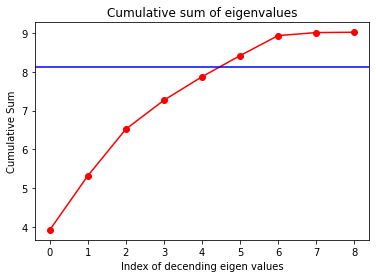

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.plot(np.cumsum(V),marker='o',color='r')
plt.axhline(y=0.9*np.cumsum(V)[8], color='b', linestyle='-')
plt.title("Cumulative sum of eigenvalues")
plt.xlabel("Index of decending eigen values")
plt.ylabel("Cumulative Sum")

We need 6 eigen vectors to explain at least 90% of variance in data thus m=6

In [ ]:
m=6
E1 = E.copy()
E1 = E1[:, :m]
P=np.matmul(X1, E1)

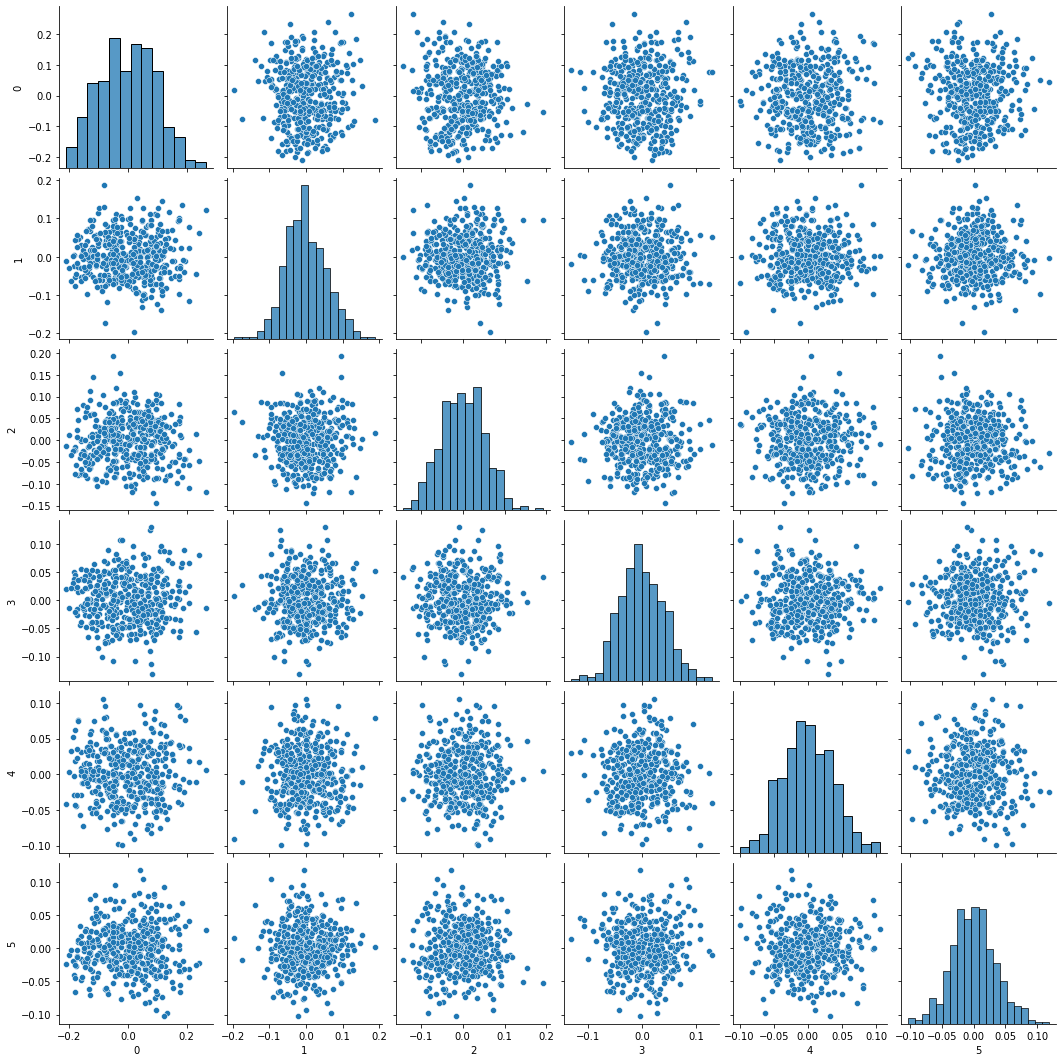

In [ ]:
import pandas as pd
sb.pairplot(pd.DataFrame(P))


No there is no relation between the projected features as all non diagonal plots are scatter plots.

**B.4**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
S=pca.fit(Xmustd)

Text(0, 0.5, 'Cumulative Variance')

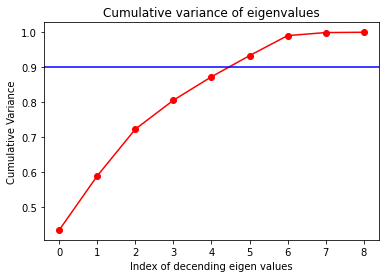

In [ ]:
skvar=pca.explained_variance_ratio_
skcumsumvar=skvar.cumsum()
plt.plot(skcumsumvar,marker='o',color='r')
plt.axhline(y=0.9, color='b', linestyle='-')
plt.title("Cumulative variance of eigenvalues")
plt.xlabel("Index of decending eigen values")
plt.ylabel("Cumulative Variance")

In [ ]:
m=6
E1sk = E.copy()
E1sk = E1sk[:, :m]
Psk=np.matmul(X1,E1sk)

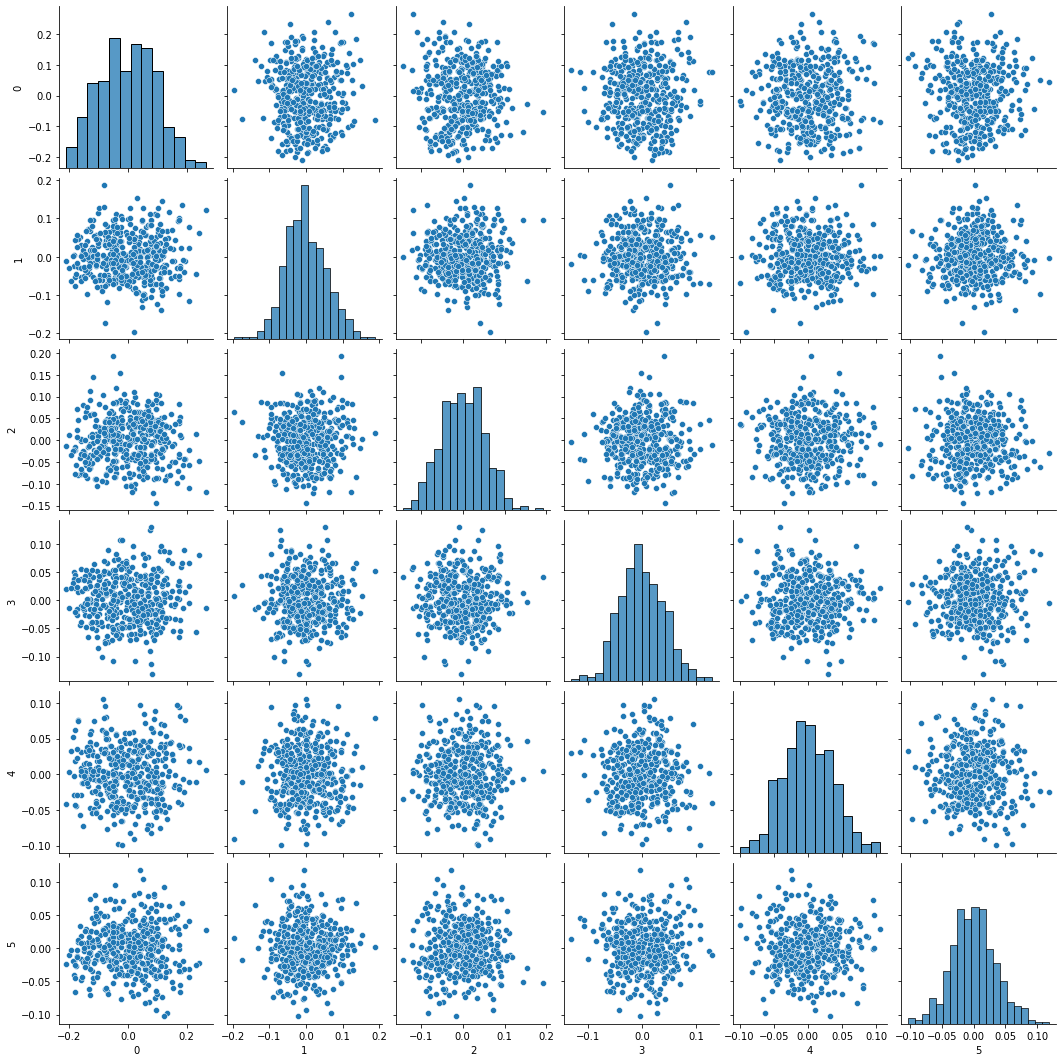

In [ ]:
import pandas as pd
sb.pairplot(pd.DataFrame(Psk))